In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

### Q1: Find the Linear regression for this data

In [3]:
X = df.iloc[:, -1:].values
y = df.iloc[:, 0].values

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
print(f'The co-efficient is {regressor.coef_[0]}')
print(f'The intercept is {regressor.intercept_}')

The co-efficient is 0.20299973140771363
The intercept is 0.45931464523595267


The formula for Simple linear regression is;<br>
y = mx + c<br>
So the linear regression of this data is;<br>
y = 0.2029x + 0.45931

### Q2: Chart the original data and the equation on the chart

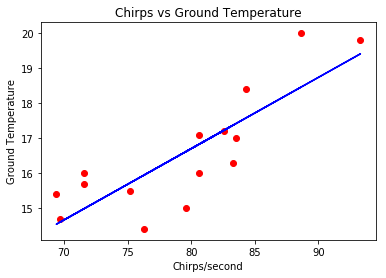

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Chirps vs Ground Temperature')
plt.xlabel('Chirps/second')
plt.ylabel('Ground Temperature')
plt.show()

### Q3: Find the equation's  $R^2$  score (use the .score method) to determine whether the equation is a good fit for this data

In [7]:
regressor.score(X, y)

0.6922946529146998

The R-Squared Score is 0.69, it is considered as a good fit for the data.

### Q4: Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [8]:
print(f'The approximate rate, the crickets to be chirping  when the temperature reached 95 is {regressor.predict([[95]])[0]}')

The approximate rate, the crickets to be chirping  when the temperature reached 95 is 19.74428912896875


### Q5: Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [9]:
# x = (y - c)/m
feature = (18 - regressor.intercept_)/regressor.coef_[0]
print(f'The ground temperature when the crickets chirping at the rate of 18 chirps/second is {feature}')

The ground temperature when the crickets chirping at the rate of 18 chirps/second is 86.40743134548568


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [10]:
df = pd.read_fwf("brain_body.txt")

In [11]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [12]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [13]:
# Outliers detection
iqr = df['Brain'].quantile(0.75) - df['Brain'].quantile(0.25)
upper_threshold = df['Brain'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Brain'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-70.80375000000001
119.60625


In [14]:
# Treating Outlier
df['Brain'].clip(-70, 119.60, inplace = True)

In [15]:
# Outlier detection in Target
## ** Since dataset length is small and contains drastic values, we are treating targets in this particular dataset **
iqr = df['Body'].quantile(0.75) - df['Body'].quantile(0.25)
upper_threshold = df['Body'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Body'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-238.375
408.625


In [16]:
# Treating outliers in target
df['Body'].clip(-238.37, 408.62, inplace = True)

### Q1: Find the linear regression equation for this data for brain weight to body weight

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print(f'The co-efficient is {regressor.coef_[0]}')
print(f'The intercept is {regressor.intercept_}')

The co-efficient is 2.920093497203094
The intercept is 19.480712820528495


The formula for Simple linear regression is;<br>
y = mx + c<br>
So the linear regression of this data is;<br>
y = 2.92x + 19.4807

### Q2: Chart the original data and the equation on the chart

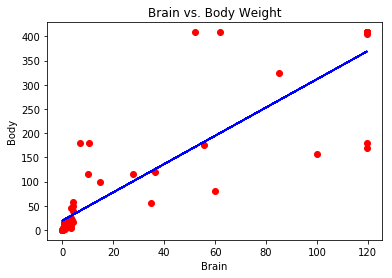

In [20]:
y_pred = regressor.predict(X)
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Brain vs. Body Weight')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show() 

### Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data

In [21]:
regressor.score(X, y)

0.788973202335476

The R-Squared Score is 0.78, it is a strong correlation for the data.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [22]:
column_names = ["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]
df = pd.read_fwf("salary.txt", header=None, 
                 names=column_names)

In [23]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [24]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


### Q1: Find the linear regression equation for this data using columns 1-5 to column 6

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
r1 = regressor.fit(X,y)

In [27]:
print(f'The equation for this data is:\ny = {regressor.coef_[0]}x + {regressor.intercept_}')

The equation for this data is:
y = 1241.7924996014372x + 11410.146547255557


### Q2: Find the selection of columns with the best  $R^2$  score

In [28]:
r1.score(X, y)

0.8547180674410969

In [29]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


The correlation of 'Degree' is between -0.2 and +0.2. So, lets try removing 'Degree' and find $R^2$ Squared Score

In [30]:
X1 = df[['Sex', 'Rank', 'Year', 'YSdeg']].values
r2 = regressor.fit(X1, y)

In [31]:
r2.score(X1, y)

0.8490366192262853

The $R^2$ Squared Score is less compared to data with 'Degree' Column. So, the $R^2$ Score is maximum (0.85471) is with the all the columns.

### Q3: Report whether sex is a factor in salary

In [32]:
df[['Sex', 'Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [33]:
X2 = df[['Sex']].values
r3 = regressor.fit(X2, y)
regressor.score(X2, y)

0.06389892583288004

The correlation is of 'Sex' to 'Column' is -0.25278 which is somewhat gives a linear relation.<br>
To confirm, the $R^2$ Squared Score is calculated which is 0.06389. This is a very bad score.<br>
So, we conclude that the 'Sex' column is not a factor in salary